<a href="https://colab.research.google.com/github/jessicamadridmejia/EIA-Diplomado-IA-Modulo4/blob/master/Ejercicio2019_05_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
pip install scikit-fuzzy

     |████████████████████████████████| 1.0MB 3.5MB/s 
  Stored in directory: /root/.cache/pip/wheels/9d/f9/0e/a8de3e98e64bbf828f5e762936ff5a40e72331dbe663470711
Successfully built scikit-fuzzy


75.00215141386592


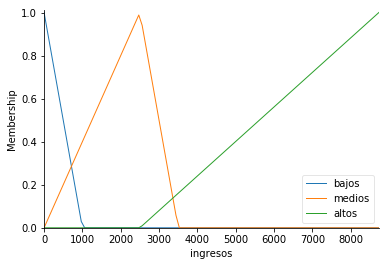

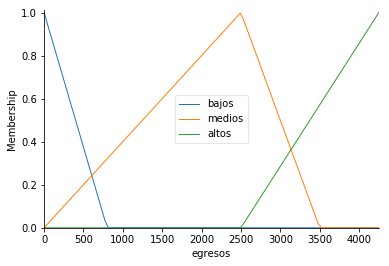

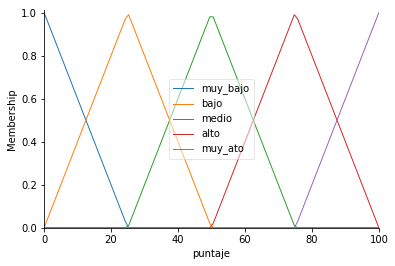

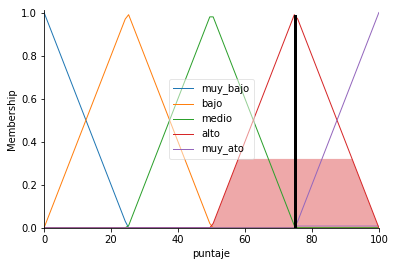

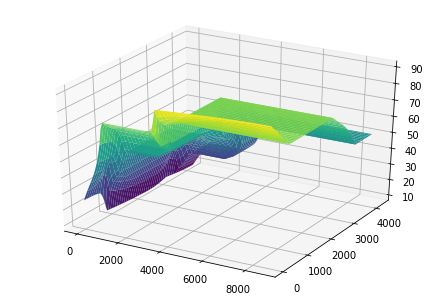

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as fis

ingresos = fis.Antecedent(np.linspace(0,8737,100),'ingresos')
egresos = fis.Antecedent(np.linspace(0,4252,100),'egresos')

puntaje = fis.Consequent(np.linspace(0,100,100),'puntaje') #tercer parametro el metodo, por defecto centroide, se puede cambiar por bisectriz,som,mom,lom

#Variables de entrada
#ingresos.automf(names=['bajos','medios','altos']) #particiones automaticas
#particiones determinadas por un experto
ingresos['bajos'] = fuzz.trimf(ingresos.universe,[0,0,1000])
ingresos['medios'] = fuzz.trimf(ingresos.universe,[0,2500,3500])
ingresos['altos'] = fuzz.trimf(ingresos.universe,[2500,8737,8737])
ingresos.view()

#egresos.automf(names=['bajos','medios','altos']) #particiones automaticas
#particiones determinadas por un experto
egresos['bajos'] = fuzz.trimf(egresos.universe,[0,0,800])
egresos['medios'] = fuzz.trimf(egresos.universe,[0,2500,3500])
egresos['altos'] = fuzz.trimf(egresos.universe,[2500,4252,4252])
egresos.view()

#Variables de salida
puntaje.automf(names=['muy_bajo','bajo','medio','alto','muy_ato'])
puntaje.view()


#Reglas: multiplicacion de las particiones de las variables de entrada 3 X 3 = 9
r1 = fis.Rule(ingresos['bajos'] & egresos['bajos'],puntaje['bajo'])
r2 = fis.Rule(ingresos['bajos'] & egresos['medios'],puntaje['muy_bajo'])
r3 = fis.Rule(ingresos['bajos'] & egresos['altos'],puntaje['muy_bajo'])
r4 = fis.Rule(ingresos['medios'] & egresos['bajos'],puntaje['alto'])
r5 = fis.Rule(ingresos['medios'] & egresos['medios'],puntaje['medio'])
r6 = fis.Rule(ingresos['medios'] & egresos['altos'],puntaje['bajo'])
r7 = fis.Rule(ingresos['altos'] & egresos['bajos'],puntaje['muy_ato'])
r8 = fis.Rule(ingresos['altos'] & egresos['medios'],puntaje['alto'])
r9 = fis.Rule(ingresos['altos'] & egresos['altos'],puntaje['medio'])

reglas = fis.ControlSystem([r1,r2,r3,r4,r5,r6,r7,r8,r9])
puntaje_fis = fis.ControlSystemSimulation(reglas) #toma el antecedente y consecuente que esta en la definicion de las reglas

puntaje_fis.input['ingresos'] = 7000
puntaje_fis.input['egresos'] = 800

puntaje_fis.compute() #calcular el puntaje de los ingresos y egresos ingresados

print(puntaje_fis.output['puntaje'])
puntaje.view(sim=puntaje_fis)




# Librería para gráficas 3D
from mpl_toolkits.mplot3d import Axes3D
#Librería de colores
from matplotlib import cm

a = ingresos.universe
b = egresos.universe

S = np.zeros((a.size,b.size))

for i in range(a.size):
  for j in range(b.size):
    puntaje_fis.input['ingresos'] = a[i]
    puntaje_fis.input['egresos'] = b[j]
    
    puntaje_fis.compute() #calcular el puntaje de los ingresos y egresos ingresados

    S[i][j] = puntaje_fis.output['puntaje']
    
x,y = np.meshgrid(a,b)

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(x,y,S.transpose(),cmap=cm.viridis)


Saving riesgoC.csv to riesgoC (11).csv
Para el cliente 1 el puntaje es: 71.73771284812267
Para el cliente 2 el puntaje es: 72.11908271499536
Para el cliente 3 el puntaje es: 59.52788331997208
Para el cliente 4 el puntaje es: 43.81075552041292
Para el cliente 5 el puntaje es: 74.98795004268031
Para el cliente 6 el puntaje es: 50.00000000000002
Para el cliente 7 el puntaje es: 45.93877871508935
Para el cliente 8 el puntaje es: 41.788951477525366
Para el cliente 9 el puntaje es: 72.197944833749
Para el cliente 10 el puntaje es: 71.34174055757852
Para el cliente 11 el puntaje es: 67.8689517486771
Para el cliente 12 el puntaje es: 72.6290995731017
Para el cliente 13 el puntaje es: 66.34068013068517
Para el cliente 14 el puntaje es: 47.76905019355376
Para el cliente 15 el puntaje es: 53.37355752625105
Para el cliente 16 el puntaje es: 52.15887360262053
Para el cliente 17 el puntaje es: 63.927154406318046
Para el cliente 18 el puntaje es: 66.10917679941583
Para el cliente 19 el puntaje es: 44

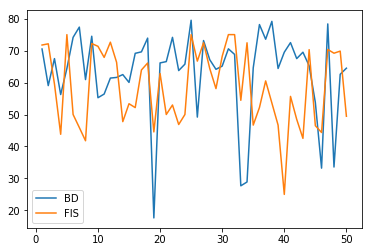

In [0]:
from google.colab import files
import io
import pandas as pd

carga = files.upload()
data = io.BytesIO(carga['riesgoC.csv'])

df = pd.read_csv(data)

bd = list()
fis = list()

for i, fila in df.iterrows():
  puntaje_fis.input['ingresos'] = fila[0]/1000
  puntaje_fis.input['egresos'] = fila[1]/1000
  bd.append(fila[2])
  
  
  puntaje_fis.compute()
  fis.append(puntaje_fis.output['puntaje'])
  
  print("Para el cliente "+str(i+1)+" el puntaje es: "+str(fis[i]))
  #print("Para el cliente "+str(i+1)+" el puntaje es: "+str(puntaje_fis.output['puntaje']+ " puntaje real: "+(fila[2])))
  
plt.plot(np.arange(1,51),bd[:50],np.arange(1,51),fis[:50])  
plt.legend(('BD','FIS'))

703821.3434375626


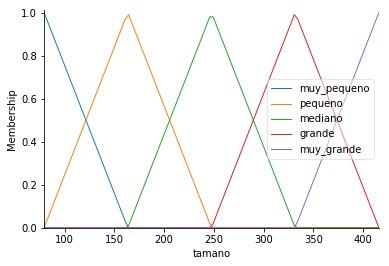

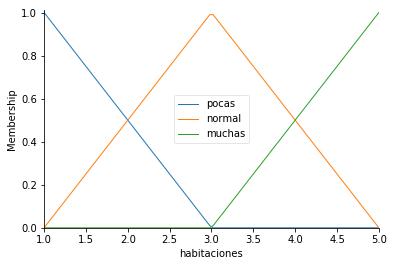

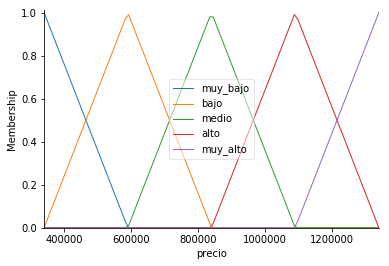

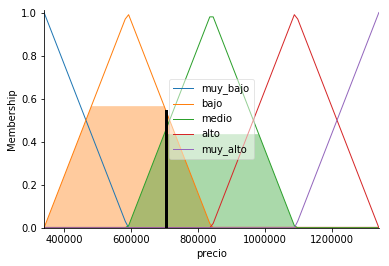

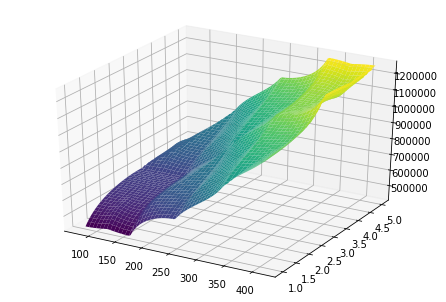

In [0]:
# Ejercicio casas
import matplotlib.pyplot as plt
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as fis

tamano = fis.Antecedent(np.linspace(79.15,416.02,100),'tamano')
habitaciones = fis.Antecedent(np.linspace(1,5,100),'habitaciones')


precio = fis.Consequent(np.linspace(339800,1339800,100),'precio') 



#Variables de entrada
tamano.automf(names=['muy_pequeno','pequeno','mediano','grande','muy_grande']) #particiones automaticas
#particiones determinadas por un experto
#tamano['pequeno'] = fuzz.trimf(tamano.universe,[0,0,1000])
tamano.view()

habitaciones.automf(names=['pocas','normal','muchas']) #particiones automaticas
#particiones determinadas por un experto
#egresos['bajos'] = fuzz.trimf(egresos.universe,[0,0,800])
#egresos['medios'] = fuzz.trimf(egresos.universe,[0,2500,3500])
#egresos['altos'] = fuzz.trimf(egresos.universe,[2500,4252,4252])
habitaciones.view()

#Variables de salida
precio.automf(names=['muy_bajo','bajo','medio','alto','muy_alto'])
precio.view()




#Reglas: multiplicacion de las particiones de las variables de entrada 5 X 3 = 15
r1 = fis.Rule(tamano['muy_pequeno'] & habitaciones['pocas'],precio['muy_bajo'])
r2 = fis.Rule(tamano['muy_pequeno'] & habitaciones['normal'],precio['bajo'])
r3 = fis.Rule(tamano['muy_pequeno'] & habitaciones['muchas'],precio['bajo'])
r4 = fis.Rule(tamano['pequeno'] & habitaciones['pocas'],precio['muy_bajo'])
r5 = fis.Rule(tamano['pequeno'] & habitaciones['normal'],precio['bajo'])
r6 = fis.Rule(tamano['pequeno'] & habitaciones['muchas'],precio['medio'])
r7 = fis.Rule(tamano['mediano'] & habitaciones['pocas'],precio['bajo'])
r8 = fis.Rule(tamano['mediano'] & habitaciones['normal'],precio['medio'])
r9 = fis.Rule(tamano['mediano'] & habitaciones['muchas'],precio['alto'])
r10 = fis.Rule(tamano['grande'] & habitaciones['pocas'],precio['medio'])
r11 = fis.Rule(tamano['grande'] & habitaciones['normal'],precio['alto'])
r12 = fis.Rule(tamano['grande'] & habitaciones['muchas'],precio['muy_alto'])
r13 = fis.Rule(tamano['muy_grande'] & habitaciones['pocas'],precio['alto'])
r14 = fis.Rule(tamano['muy_grande'] & habitaciones['normal'],precio['muy_alto'])
r15 = fis.Rule(tamano['muy_grande'] & habitaciones['muchas'],precio['muy_alto'])

reglas = fis.ControlSystem([r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,r11,r12,r13,r14,r15])
precio_fis = fis.ControlSystemSimulation(reglas) #toma el antecedente y consecuente que esta en la definicion de las reglas

precio_fis.input['tamano'] = 200
precio_fis.input['habitaciones'] = 3

precio_fis.compute() #calcular el puntaje de los ingresos y egresos ingresados

print(precio_fis.output['precio'])
precio.view(sim=precio_fis)



# Librería para gráficas 3D
from mpl_toolkits.mplot3d import Axes3D
#Librería de colores
from matplotlib import cm

a = tamano.universe
b = habitaciones.universe

S = np.zeros((a.size,b.size))

for i in range(a.size):
  for j in range(b.size):
    puntaje_fis.input['tamano'] = a[i]
    puntaje_fis.input['habitaciones'] = b[j]
    
    puntaje_fis.compute() #calcular el puntaje de los ingresos y egresos ingresados

    S[i][j] = puntaje_fis.output['precio']
    
x,y = np.meshgrid(a,b)

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(x,y,S.transpose(),cmap=cm.viridis)



714606.1068316696


ValueError: ignored

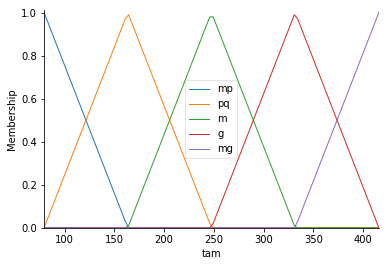

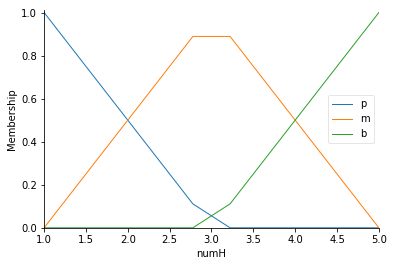

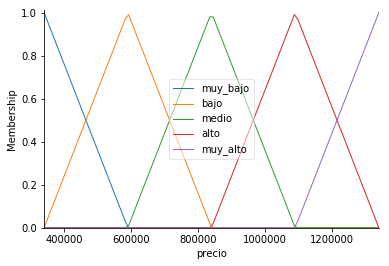

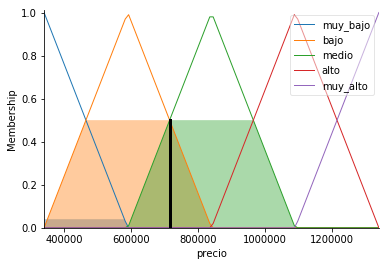

In [0]:
# Ejercicio casas
import matplotlib.pyplot as plt
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as fis

tam = fis.Antecedent(np.linspace(79.15,416.02,100),'tam')
numH = fis.Antecedent(np.linspace(1,5,10),'numH')


precio = fis.Consequent(np.linspace(339800,1339800,100),'precio') 



#Variables de entrada
tam.automf(names=['mp','pq','m','g','mg']) #particiones automaticas
tam.view()

numH.automf(names=['p','m','b']) #particiones automaticas
numH.view()

#Variables de salida
precio.automf(names=['muy_bajo','bajo','medio','alto','muy_alto'])
precio.view()




#Reglas: multiplicacion de las particiones de las variables de entrada 5 X 3 = 15
r1 = fis.Rule(tam['mp'] & numH['p'],precio['muy_bajo'])
r2 = fis.Rule(tam['mp'] & numH['m'],precio['muy_bajo'])
r3 = fis.Rule(tam['mp'] & numH['b'],precio['bajo'])
r4 = fis.Rule(tam['pq'] & numH['p'],precio['bajo'])
r5 = fis.Rule(tam['pq'] & numH['m'],precio['bajo'])
r6 = fis.Rule(tam['pq'] & numH['b'],precio['medio'])
r7 = fis.Rule(tam['m'] & numH['p'],precio['bajo'])
r8 = fis.Rule(tam['m'] & numH['m'],precio['medio'])
r9 = fis.Rule(tam['m'] & numH['b'],precio['medio'])
r10 = fis.Rule(tam['g'] & numH['p'],precio['medio'])
r11 = fis.Rule(tam['g'] & numH['m'],precio['alto'])
r12 = fis.Rule(tam['g'] & numH['b'],precio['alto'])
r13 = fis.Rule(tam['mg'] & numH['p'],precio['muy_alto'])
r14 = fis.Rule(tam['mg'] & numH['m'],precio['muy_alto'])
r15 = fis.Rule(tam['mg'] & numH['b'],precio['muy_alto'])

reglas = fis.ControlSystem([r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,r11,r12,r13,r14,r15])
precio_fis = fis.ControlSystemSimulation(reglas) #toma el antecedente y consecuente que esta en la definicion de las reglas

precio_fis.input['tam'] = 160
precio_fis.input['numH'] = 4

precio_fis.compute() #calcular el puntaje de los ingresos y egresos ingresados

print(precio_fis.output['precio'])
precio.view(sim=precio_fis)



# Librería para gráficas 3D
from mpl_toolkits.mplot3d import Axes3D
#Librería de colores
from matplotlib import cm

a = tam.universe
b = numH.universe

S = np.zeros((a.size,b.size))

for i in range(a.size):
  for j in range(b.size):
    puntaje_fis.input['tam'] = a[i]
    puntaje_fis.input['numH'] = b[j]
    
    puntaje_fis.compute() #calcular el puntaje de los ingresos y egresos ingresados

    S[i][j] = puntaje_fis.output['precio']
    
x,y = np.meshgrid(a,b)

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(x,y,S.transpose(),cmap=cm.viridis)



Saving precioCasas.csv to precioCasas (1).csv
Para el cliente 1 el puntaje es: 606047811.5717317
Para el cliente 2 el puntaje es: 757870782.149037
Para el cliente 3 el puntaje es: 570849658.1515102
Para el cliente 4 el puntaje es: 948293714.5607677
Para el cliente 5 el puntaje es: 714846114.1582528
Para el cliente 6 el puntaje es: 602962416.4287833
Para el cliente 7 el puntaje es: 595726335.5498962
Para el cliente 8 el puntaje es: 591623428.5710219
Para el cliente 9 el puntaje es: 600573973.4872491
Para el cliente 10 el puntaje es: 714846114.1582528
Para el cliente 11 el puntaje es: 666026806.474253
Para el cliente 12 el puntaje es: 635946628.6207474
Para el cliente 13 el puntaje es: 1256416182.2220573
Para el cliente 14 el puntaje es: 579387904.0220902
Para el cliente 15 el puntaje es: 726436579.3168963
Para el cliente 16 el puntaje es: 561567323.4960403
Para el cliente 17 el puntaje es: 575174718.7371099
Para el cliente 18 el puntaje es: 811849843.4681883
Para el cliente 19 el puntaj

ValueError: ignored

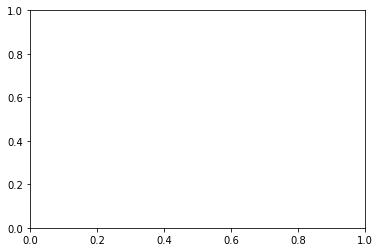

In [0]:
from google.colab import files
import io
import pandas as pd

carga = files.upload()
data = io.BytesIO(carga['precioCasas.csv'])

df = pd.read_csv(data)

bd = list()
fis = list()

for i, fila in df.iterrows():
  precio_fis.input['tam'] = fila[0]
  precio_fis.input['numH'] = fila[1]
  bd.append(fila[2])
  
  
  precio_fis.compute()
  fis.append(precio_fis.output['precio']*1000)
  
  print("Para el cliente "+str(i+1)+" el puntaje es: "+str(fis[i]))
  
plt.plot(np.arange(1,47),bd,np.arange(1,47),fis)  
plt.legend(('BD','FIS'))

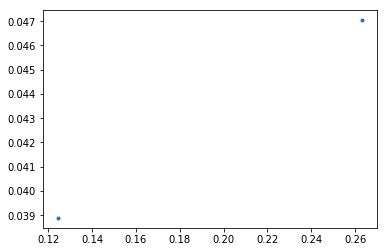

In [0]:
from google.colab import files
import io
import pandas as pd

carga = files.upload()
data = io.BytesIO(carga['riesgoC.csv'])

df = pd.read_csv(data)

colores = ['b','orange','g','c','m','y']

datos = df.values
datos = datos[:][:2]
maxi = np.amax(datos,axis=0)
datos = datos/maxi #normaliza los datos dividiendo por el maximo
datos = datos[:][0:2].transpose() #guarda todas las filas solo las dos primeras columnas (features)

plt.figure()
plt.plot(datos[0][:],datos[1][:],'.')

cnt,u,u0,d,jm,p,fpc = fuzz.cluster.cmeans(datos,nc,2,error=0.005,maxiter=100,init=None)
cmp = np.argmax(u,axis=0)

plt.figure()
for j in range(nc):
  plt.plot(datos[0][cmp==j],datos[1][cmp==1],'.',colores[j])

#Grafica los centros  
for pt in cnt:  
  plt.plot(pt[0],pt[1],'rs')